# 3. Number Recognition :
### Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits.

## importing libraries

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

## Loading as well as splitting the dataset in train test

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
## cheacking the shape of test data
X_test.shape

(10000, 28, 28)

In [4]:
## cheacking the shape of train data
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

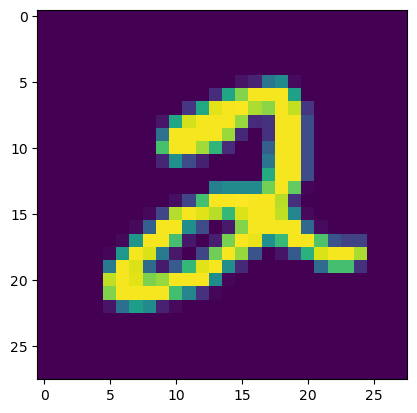

In [21]:
## displaying the 5 index of train data
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [8]:
## dividing it by 255
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
## making the model
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
## showing the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
## compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
## fitting the model
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2816 - accuracy: 0.9165 - val_loss: 0.1388 - val_accuracy: 0.9583
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1163 - accuracy: 0.9652 - val_loss: 0.1330 - val_accuracy: 0.9606
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0899 - val_accuracy: 0.9727
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0870 - val_accuracy: 0.9742
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.1027 - val_accuracy: 0.9732
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.1223 - val_accuracy

In [14]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
## cheacking the accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

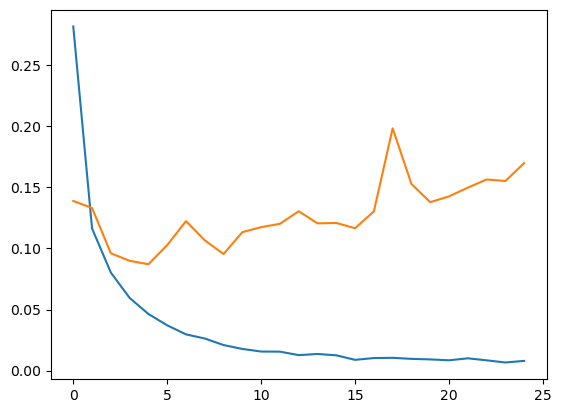

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

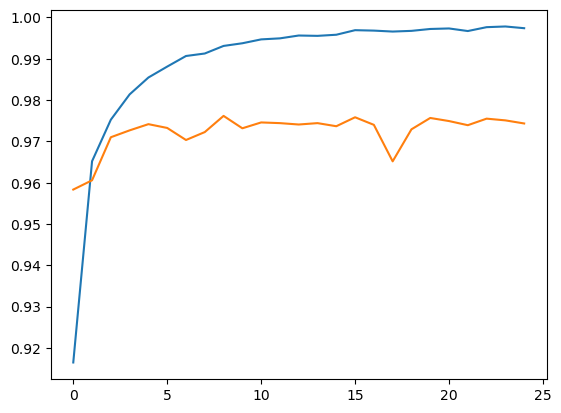

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

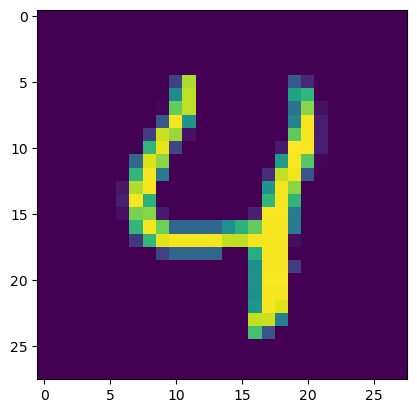

In [25]:
plt.imshow(X_test[4])

In [26]:
## cheacking for predictions
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 46ms/step


array([4], dtype=int64)